<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/Gaby/DLY0100_Entrega_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluaci√≥n 1 - Entrenando redes feedforward

**Autores:**

+ Nicolas Navarro
+ Gabriela Sandoval

**Correos Electr√≥nicos:**

+ ni.navarroa@duoc.cl
+ g.sandoval@duoc.cl

**Fecha de Creaci√≥n:** Abril de 2025  
**Versi√≥n:** 1.0  

---

## Descripci√≥n

Este notebook contiene el desarrollo de la evaluaci√≥n 1 de la asignatura de Deep Learning de la carrera de Ingenier√≠a en Inform√°tica de DuocUC sede Concepci√≥n.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [ ]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-16 10:01:43--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.115.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‚Äòtrain-images-idx3-ubyte.gz‚Äô

train-images-idx3-u 100%[===================>]   9.45M  30.8MB/s    in 0.3s    

2025-04-16 10:01:44 (30.8 MB/s) - ‚Äòtrain-images-idx3-ubyte.gz‚Äô saved [9912422/9912422]

--2025-04-16 10:01:45--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.155.207, 142.250.31.207, 172.253.122.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.155.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881

In [ ]:
!ls -lh

total 16M
-rw-r--r--. 1 root users 4.4M Apr 14 19:19 prueba.pkl
-rw-r--r--. 1 root users 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r--. 1 root users 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r--. 1 root users 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r--. 1 root users  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [ ]:
import gzip
import pandas as pd
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
###
from keras.utils import to_categorical

2025-04-16 10:01:48.384771: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 10:01:48.435481: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-16 10:01:48.435632: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-16 10:01:48.436998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-16 10:01:48.444933: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 10:01:48.446406: I tensorflow/core/platform/cpu_feature_guard.cc:1

#Introduccion

Introducci√≥n: Descripci√≥n del problema y objetivo del modelo.


En este notebook se trabajar√° con el dataset MNIST, que contiene im√°genes de d√≠gitos escritos a mano (0‚Äì9). Como primer paso, es fundamental preprocesar los datos antes de entrenar una red neuronal.

Primero, cada imagen tiene un tama√±o original de 28x28 p√≠xeles, lo que significa que est√° compuesta por 784 valores (28√ó28). Para poder trabajar con estas im√°genes en una red neuronal, debemos aplanarlas, es decir, se convierten en un vector de tama√±o 784 en lugar de una matriz 2D.

Luego, las im√°genes se normalizan, es decir, se dividen sus valores por 255 para que queden entre 0 y 1. Esto mejora la eficiencia del entrenamiento, ya que evita trabajar con n√∫meros muy grandes que podr√≠an afectar negativamente el c√°lculo de los gradientes durante el entrenamiento.

Por otra parte, las etiquetas que indican el n√∫mero que representa cada imagen tambi√©n deben ser procesadas. En este caso utilizaremos el one-hot encoding, lo que convierte, por ejemplo, un "3" en el vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esto es necesario porque la red no puede trabajar directamente con n√∫meros enteros como clases, ya que no entiende que son categor√≠as y no cantidades.

El dataset incluye 60.000 im√°genes para entrenamiento y 10.000 para prueba, lo que permite entrenar el modelo con muchos ejemplos y evaluarlo con datos nuevos para medir su capacidad de generalizar.

Finalmente, este preprocesamiento adapta correctamente las im√°genes y etiquetas al formato que requiere la red neuronal para aprender de manera efectiva.

# Carga de im√°genes

In [ ]:
# Funci√≥n para cargar im√°genes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Funci√≥n para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificaci√≥n

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


# Muestra im√°genes

In [ ]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

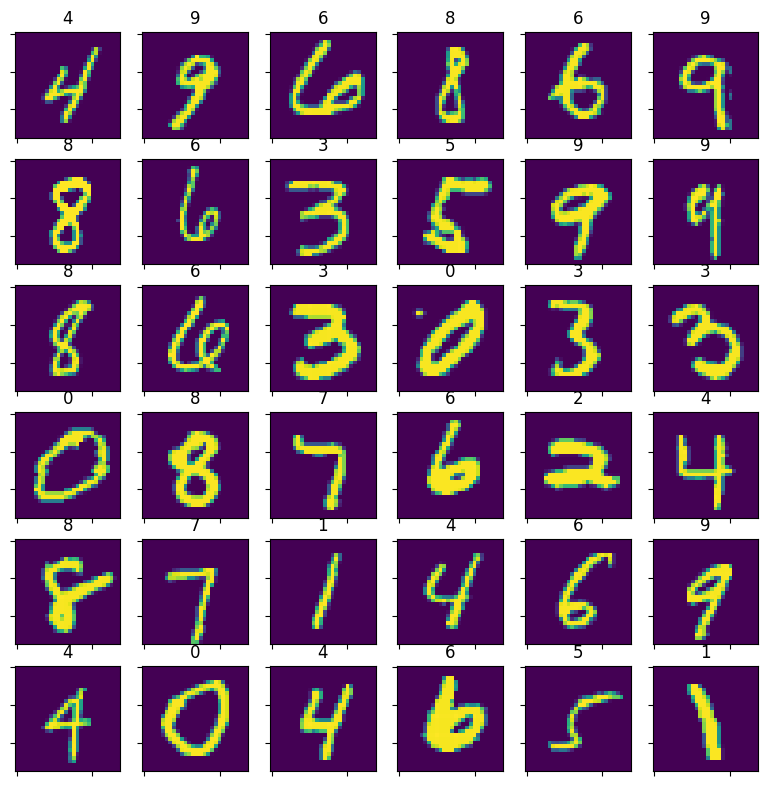

In [ ]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [ ]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de im√°genes del n√∫mero {i}: {numimagen[i]}")

Cantidad de im√°genes del n√∫mero 0: 5923.0
Cantidad de im√°genes del n√∫mero 1: 6742.0
Cantidad de im√°genes del n√∫mero 2: 5958.0
Cantidad de im√°genes del n√∫mero 3: 6131.0
Cantidad de im√°genes del n√∫mero 4: 5842.0
Cantidad de im√°genes del n√∫mero 5: 5421.0
Cantidad de im√°genes del n√∫mero 6: 5918.0
Cantidad de im√°genes del n√∫mero 7: 6265.0
Cantidad de im√°genes del n√∫mero 8: 5851.0
Cantidad de im√°genes del n√∫mero 9: 5949.0


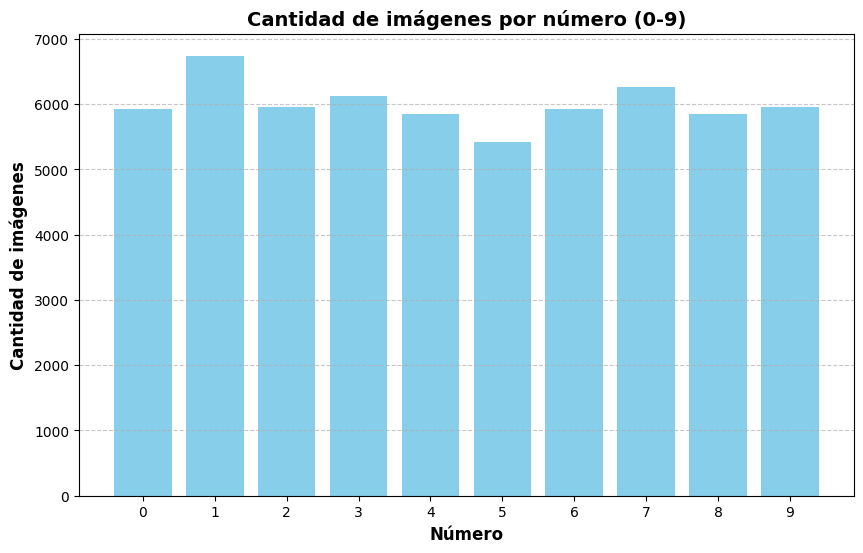

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(numimagen)), numimagen, color='skyblue')
plt.title('Cantidad de im√°genes por n√∫mero (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('N√∫mero', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de im√°genes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

Las im√°genes del dataset est√°n relativamente balanceadas entre las 10 clases. La clase con m√°s ejemplos es el n√∫mero 1 (6742 im√°genes) y la que menos tiene es el n√∫mero 5 (5421 im√°genes). Aunque hay peque√±as diferencias, la distribuci√≥n es lo suficientemente equilibrada como para entrenar modelos sin riesgo significativo de sesgo hacia una clase espec√≠fica.

1. explicacion m,n,c
2. explicacion seed
3. explicacion cantidad de capas ocupltas y su valor
4. cantidad de epocas
5. explicacion de funcion loss (si categorical_crossentropy no binary_corss)
5. eleccion de optimizadores (sgd y adam)
6. eleccion de avticadores con sus ventajas (relu y elu)
6. con activacion (relu)
7. vs con avticacion (elu)
8. explicaion de comparacion de fun activacion
9. cambio bachsize y explicacion
10. cambio epocas y explicacion
11. drop out
12. comparacion mejor modelo sin regulacion y con


#Entrenamiento y ajuste de hiperpar√°metros

## Explicaci√≥n M, N y C

In [ ]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


M: Representa la cantidad de ejemplos en tu conjunto de entrenamiento: 60,000 im√°genes de d√≠gitos.

N:Las im√°genes MNIST son de 28x28 p√≠xeles= 784. Cada imagen se "aplana" (flatten) a un vector de 784 caracter√≠sticas.

C: Es la cantidad de clases posibles (d√≠gitos del 0 al 9). El vector y_train fue codificado con One-Hot Encoding, por eso tiene 10 columnas.

## Explicaci√≥n Seed

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

El prop√≥sito principal de establecer las semillas de los generadores de n√∫meros aleatorios es permitir la reproducibilidad del c√≥digo. Al fijar estas semillas, se asegura que cualquier persona que ejecute este c√≥digo bajo las mismas condiciones (misma versi√≥n de librer√≠as, hardware, etc.) obtendr√° los mismos resultados. Esto es fundamental para la investigaci√≥n cient√≠fica, ya que permite validar resultados y compararlos en diferentes pruebas.

## Explicacion cantidad de capas ocupltas y su valor

In [ ]:
h1 = 512
h2 = 256
h3 = 128

h1 = 512	Primera capa oculta tendr√° 512 neuronas. Recibe la entrada (los 784 pixeles de cada imagen)

h2 = 256	Segunda capa oculta tendr√° 256 neuronas.Aprende combinaciones m√°s complejas de lo anterior.

h3 = 128	Tercera capa oculta tendr√° 128 neuronas.Adina la representaci√≥n hacia algo que pueda distinguir entre los 10 d√≠gitos.




chaatgipiti:
üîó ¬øPor qu√© van disminuyendo?
Esta estructura piramidal (512 ‚Üí 256 ‚Üí 128) es com√∫n porque:

Reduce el n√∫mero de par√°metros gradualmente.

Obliga al modelo a comprimir la informaci√≥n.

Ayuda a generalizar mejor y evita sobreajuste (overfitting) si se combina con t√©cnicas como Dropout.



## Explicacion epocas y batch size inicial

¬°Buena pregunta! Empezar con 10 √©pocas y batch size de 32 es una elecci√≥n bastante com√∫n en Deep Learning, especialmente cuando est√°s explorando un nuevo modelo o dataset como MNIST. Aqu√≠ va la explicaci√≥n clara y con sentido:

üß™ ¬øPor qu√© 10 √©pocas al inicio?
R√°pido de entrenar ‚Üí Puedes ver si el modelo est√° aprendiendo algo o no sin esperar demasiado.

Te da una idea preliminar de si:

El modelo empieza a mejorar

Se estanca

O incluso sobreentrena desde temprano

üì¶ ¬øPor qu√© batch size = 32?
Es un tama√±o de minibatch com√∫n y equilibrado:

Peque√±o: lo suficiente para tener cierta aleatoriedad (ruido √∫til) en los gradientes ‚Üí ayuda a escapar de m√≠nimos malos

Grande: lo suficiente para que el entrenamiento sea estable y no tarde tanto

Tambi√©n se adapta bien a:

CPUs y GPUs actuales

Memoria razonable (no explota RAM/VRAM)

Buen equilibrio entre velocidad y precisi√≥n

üß† En resumen

Par√°metro	¬øPor qu√© usarlo al principio?

epochs = 10	Para probar si el modelo aprende algo sin entrenar horas

batch_size=32	Equilibrio entre estabilidad, velocidad, ruido √∫til y rendimiento

## Explicaci√≥n de funci√≥n de perdida (loss) (si categorical_crossentropy no binary_corss)

üß† ¬øQu√© hace categorical_crossentropy?
Compara la distribuci√≥n real (las etiquetas reales, one-hot) con la distribuci√≥n predicha por la red (salida del softmax).

Calcula cu√°nto se equivoc√≥ el modelo en su predicci√≥n.

üìä ¬øPor qu√© no usar binary_crossentropy?
Porque binary_crossentropy es solo para clasificaci√≥n binaria (2 clases: 0 o 1).
Aunque podr√≠as usarlo en un problema multiclase si tratas cada clase como independiente (modo "one-vs-all"), no es lo √≥ptimo ni lo esperado en MNIST.

## Explicacion de acticador softmax en capa de salida y pq no puede ser otro

üéØ ¬øQu√© hace softmax?
Convierte el vector de salida de la √∫ltima capa (que puede tener cualquier valor real) en un vector de probabilidades, donde:

Cada valor est√° entre 0 y 1

La suma de todas las salidas da 1

La clase con mayor probabilidad es la que el modelo predice

üìå ¬øPor qu√© softmax es la √∫nica opci√≥n v√°lida aqu√≠?
Porque est√°s resolviendo un problema de clasificaci√≥n multiclase con una √∫nica clase por ejemplo (es decir, un d√≠gito del 0 al 9 por imagen).

El modelo debe elegir una sola clase

softmax convierte las salidas en probabilidades mutuamente excluyentes

Y adem√°s, la funci√≥n de p√©rdida categorical_crossentropy espera que la salida sea una distribuci√≥n de probabilidad, lo que softmax garantiza.

‚úÖ Conclusi√≥n
La activaci√≥n softmax en la capa de salida es la √∫nica opci√≥n correcta para clasificaci√≥n multiclase con one-hot encoding porque convierte las salidas en probabilidades comparables y sumables, permitiendo usar funciones como categorical_crossentropy y elegir la clase m√°s probable.

##Explicacion de optimizadores a ocupar

SGD

‚úÖ Ventajas:
Simple, f√°cil de implementar.

Buena generalizaci√≥n si se configura bien.

‚ö†Ô∏è Desventajas:
Puede ser lento en converger.

Puede oscilar mucho en terrenos con muchos m√≠nimos o curvas irregulares.

Requiere ajustar muy bien el learning rate.

üìå Ideal para:
Casos simples o si quieres control total del aprendizaje.

A veces se mejora agregando momentum para suavizar los saltos.

Adam

‚úÖ Ventajas:
Aprende m√°s r√°pido en muchos casos.

Funciona bien con poco ajuste (learning rate por defecto: 0.001).

Se adapta autom√°ticamente ‚Üí √∫til en datasets ruidosos o variables.

‚ö†Ô∏è Desventajas:
A veces no generaliza tan bien como SGD.

M√°s complejo computacionalmente (pero en la pr√°ctica, no es un problema con hardware moderno).

üìå Ideal para:
Cuando necesitas resultados r√°pidos y estables.

Problemas m√°s complejos o cuando no quieres afinar mucho a mano.


Optimizador	Ventajas	Desventajas	Cu√°ndo usar
SGD	Simple, buena generalizaci√≥n	Lento, necesita tuning	Cuando tienes tiempo y control
Adam	R√°pido, adaptable, f√°cil de usar	Puede sobreajustar en algunos casos	Para empezar, y problemas complejos

 ¬øCu√°l usar en MNIST?
Adam: funciona muy bien, r√°pido y eficaz.

SGD: √∫til si quieres experimentar o evitar sobreajuste.

‚úÖ En pr√°ctica: muchos modelos actuales empiezan con Adam por su eficiencia.

##ExpLICACION DE METRICAS PARA EVALUAR LOS MODELOS

¬°S√∫per buena observaci√≥n! Es verdad que precision, recall y F1-score se definieron originalmente para clasificaci√≥n binaria, pero s√≠ se extienden perfectamente a problemas multiclase como MNIST.

‚úÖ ¬øSirven para clasificaci√≥n multiclase?
S√≠, 100% sirven, y son muy comunes en problemas multiclase como MNIST.

üîç ¬øC√≥mo se adaptan?
En un problema con varias clases (como d√≠gitos 0‚Äì9), se calcula una m√©trica por clase, trat√°ndola como la clase positiva y al resto como negativas.

Por ejemplo:

Para calcular la precisi√≥n del d√≠gito 3, se ve cu√°ntas veces el modelo predijo 3 correctamente vs cu√°ntas veces predijo 3 en total (aunque fueran errores).

Esto se hace para cada clase del 0 al 9.

üìå En resumen:

‚ùì Pregunta	‚úÖ Respuesta
¬øSon estas m√©tricas solo para binario?	No, tambi√©n sirven para multiclase
¬øSe pueden usar con MNIST?	S√≠, y es muy recomendable
¬øTe dan valor agregado frente a accuracy?	S√≠, muestran errores por clase

# Experimento 1: Optimizador SGD

## Activadores (Relu y Elu)

üß† ¬øQu√© hace?
Si el valor de entrada es positivo, lo deja igual.

Si es negativo, lo convierte en 0.

‚úÖ Ventajas:
Muy simple y eficiente.

Evita el problema del desvanecimiento del gradiente (que pasaba con activaciones como sigmoid o tanh).

Permite que el modelo aprenda r√°pido.

‚ö†Ô∏è Problema:
Algunas neuronas pueden "morir" (quedan siempre en 0 si reciben valores negativos constantemente). Esto puede hacer que ciertas neuronas dejen de aprender, a eso se le llama "neurona muerta".

üß† ¬øQu√© hace?
Igual que ReLU para los valores positivos.

Pero en lugar de dar 0 a los negativos, les asigna un valor negativo suave (curvado), lo cual:

Permite que la red siga aprendiendo aunque reciba valores negativos.

Reduce el riesgo de neuronas muertas.

‚úÖ Ventajas:
M√°s robusta para entrenamientos largos o redes m√°s profundas.

Mejora la convergencia en algunos casos.

‚ö†Ô∏è Desventaja:
M√°s costosa computacionalmente que ReLU (usa exponenciales).

Si no est√° bien ajustado, puede introducir ruido en algunas situaciones

### Relu

In [ ]:
red_relu = keras.Sequential(name="Red_relu")
red_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_relu.summary()

Model: "Red_relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_salida (Dense)         (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Explicacion del sumary, ###Oye agregamos el sumary en TODOS los cambios? lo encuentro inutil pq nunca cambiamos la cantidad de capas o la cantidad de neuronas

En la primera capa oculta tiene 512 neuronas, las cuales se multiplican por el valor de las imagen aplanadas 784 (28x28). Los 401,920 par√°metros vienen de: 784*512 pesos + 512 sesgos

La segunda capa oculta. Tiene 256 neuronas. Los par√°metros son: 512*256 + 256

La tercera capa oculta con 128 neuronas: 256*128 + 128

 La capa de salida con 10 neuronas (las 10 etiquetas 0-9). Par√°metros: 128*10 + 10

In [ ]:
red_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_relu = red_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_relu.save("red_relu.keras")

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5408 - accuracy: 0.8608 - val_loss: 0.2670 - val_accuracy: 0.9201
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2385 - accuracy: 0.9314 - val_loss: 0.1972 - val_accuracy: 0.9430
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1849 - accuracy: 0.9466 - val_loss: 0.1622 - val_accuracy: 0.9512
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1502 - accuracy: 0.9564 - val_loss: 0.1462 - val_accuracy: 0.9564
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1255 - accuracy: 0.9643 - val_loss: 0.1256 - val_accuracy: 0.9610
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9696 - val_loss: 0.1107 - val_accuracy: 0.9667
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0920 - accuracy: 0.9742 - val_loss: 0.1062 - val_accurac

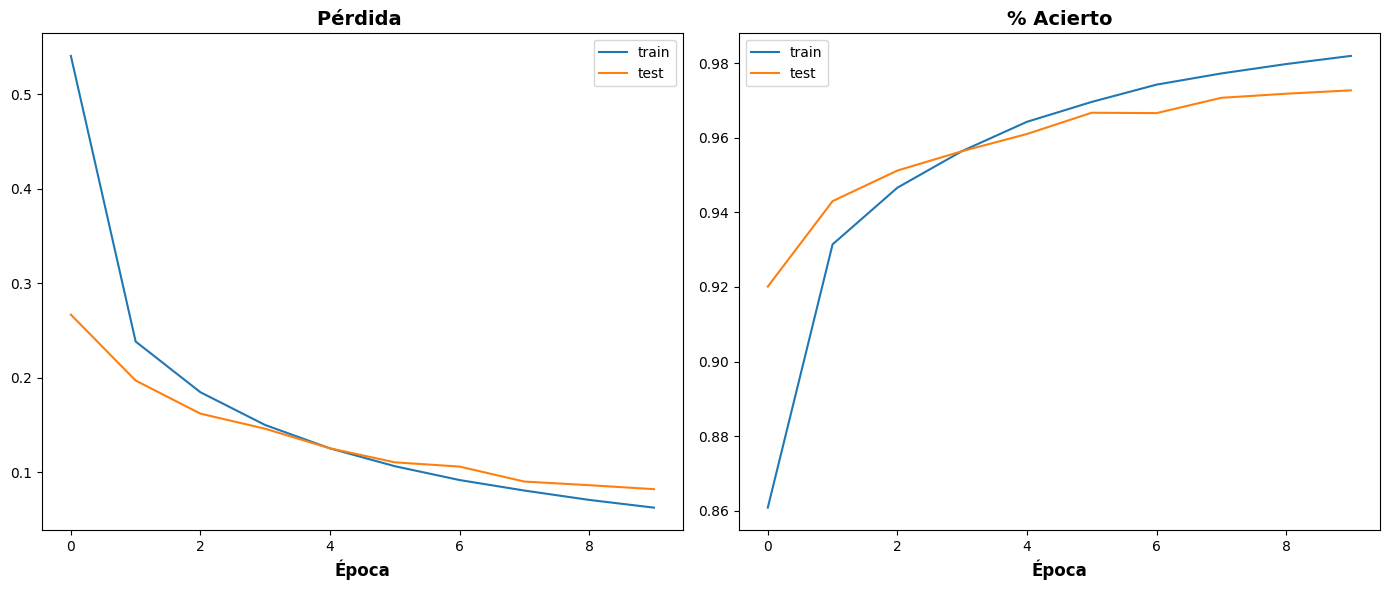

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_relu.history['loss'], label="train")
axs[0].plot(hist_relu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu.history['accuracy'], label="train")
axs[1].plot(hist_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


*COMENTARIO

### Elu

In [ ]:
red_elu = keras.Sequential(name="red_elu")
red_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu.add(keras.layers.Dense(h1, activation='elu'))
red_elu.add(keras.layers.Dense(h2, activation='elu'))
red_elu.add(keras.layers.Dense(h3, activation='elu'))
red_elu.add(keras.layers.Dense(C, activation='softmax'))

red_elu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_elu = red_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_elu.save("red_elu.keras")

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4452 - accuracy: 0.8784 - val_loss: 0.2857 - val_accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2714 - accuracy: 0.9223 - val_loss: 0.2371 - val_accuracy: 0.9308
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2282 - accuracy: 0.9343 - val_loss: 0.2051 - val_accuracy: 0.9401
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9438 - val_loss: 0.1833 - val_accuracy: 0.9462
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1719 - accuracy: 0.9501 - val_loss: 0.1616 - val_accuracy: 0.9510
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1522 - accuracy: 0.9562 - val_loss: 0.1464 - val_accuracy: 0.9559
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9606 - val_loss: 0.1414 - val_accuracy:

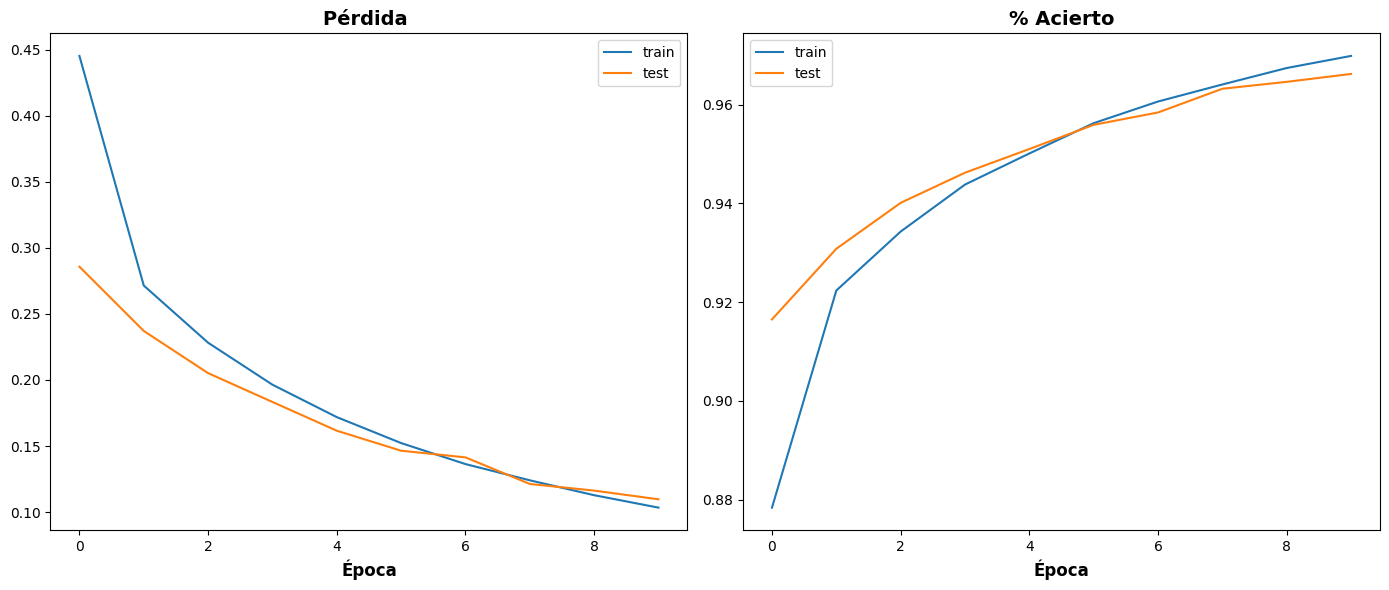

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu.history['loss'], label="train")
axs[0].plot(hist_elu.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu.history['accuracy'], label="train")
axs[1].plot(hist_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


#CONCLUSIONES RELU VS ELU

In [ ]:
relu_vs_elu = {
    'M√©trica': list(hist_relu.history.keys()),
    'hist_relu': [hist_relu.history[k][-1] for k in hist_relu.history],
    'hist_elu': [hist_elu.history[k][-1] for k in hist_elu.history]
}

df = pd.DataFrame(relu_vs_elu)

display(df)

M√©trica  hist_relu  hist_elu
0          loss   0.062757  0.103367
1      accuracy   0.981933  0.969850
2      val_loss   0.082305  0.109686
3  val_accuracy   0.972700  0.966200

ReLU mostr√≥ una alta precisi√≥n en entrenamiento (0.9983) y una buena generalizaci√≥n en validaci√≥n (0.9766), con una r√°pida convergencia (loss bajo). Sin embargo, existe el riesgo de "neuronas muertas", lo que puede afectar el aprendizaje en redes m√°s profundas o con pesos mal inicializados.

ELU, en cambio, obtuvo resultados algo inferiores en ambas m√©tricas (accuracy de 0.9705 en entrenamiento y 0.9643 en validaci√≥n), con un mayor valor de p√©rdida, lo que indica una convergencia m√°s lenta o menos eficiente. No obstante, su capacidad de producir salidas negativas ayuda a evitar el problema de las neuronas muertas, lo cual puede ser beneficioso en ciertos contextos o arquitecturas.

En resumen, ReLU se comport√≥ mejor en este caso espec√≠fico, pero ELU podr√≠a ofrecer ventajas en modelos m√°s complejos o con problemas de desactivaci√≥n de neuronas.

Ya que nuestro set de dato es simple nos eligirimos la funcion ReLU como funcion activadora para los siguientes cambios.

## Cambio batch size

### Batch size de 64

In [ ]:
red_batch64 = keras.Sequential(name="relu_bs_64")
red_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch64 = red_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
red_batch64.save("red_batch64.keras")

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.7958 - accuracy: 0.7967 - val_loss: 0.3406 - val_accuracy: 0.9033
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.3055 - accuracy: 0.9130 - val_loss: 0.2602 - val_accuracy: 0.9251
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2464 - accuracy: 0.9294 - val_loss: 0.2207 - val_accuracy: 0.9349
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2111 - accuracy: 0.9399 - val_loss: 0.2018 - val_accuracy: 0.9422
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1851 - accuracy: 0.9465 - val_loss: 0.1744 - val_accuracy: 0.9465
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1649 - accuracy: 0.9531 - val_loss: 0.1612 - val_accuracy: 0.9539
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1483 - accuracy: 0.9577 - val_loss: 0.1571 - val_accuracy: 0.9532
Epoch 

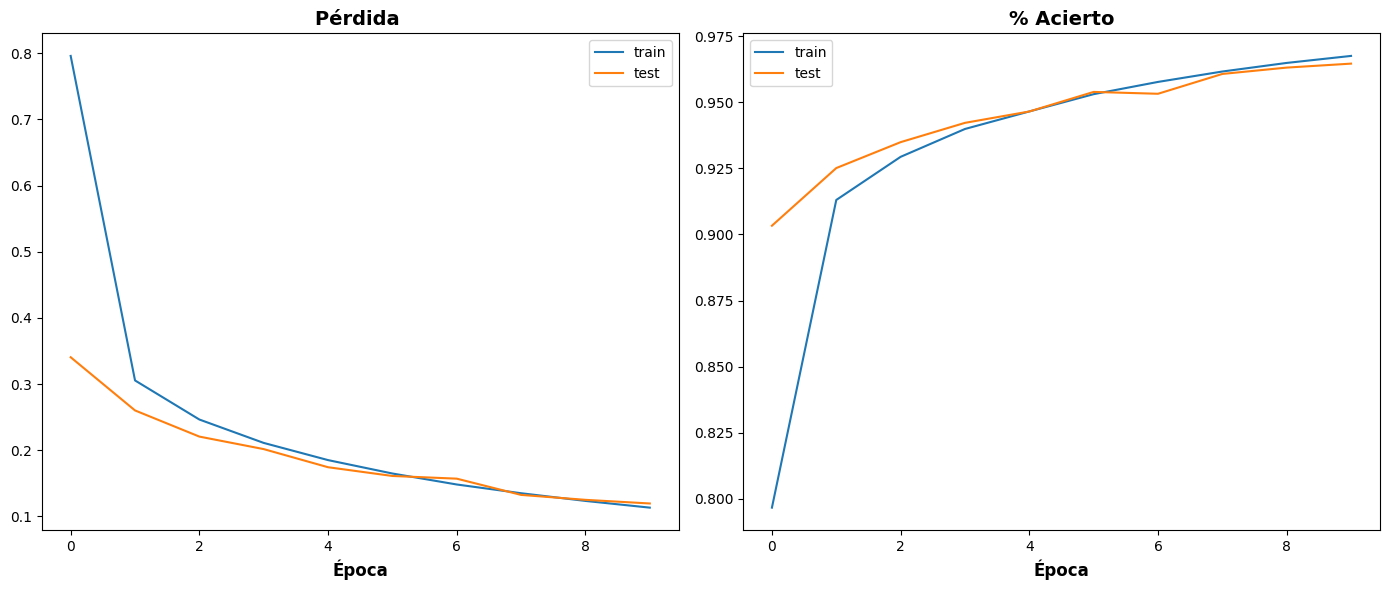

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch64.history['loss'], label="train")
axs[0].plot(hist_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch64.history['accuracy'], label="train")
axs[1].plot(hist_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### Batch size de 256

In [ ]:
red_batch256 = keras.Sequential(name="batch256")
red_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch256.add(keras.layers.Dense(h1, activation='relu'))
red_batch256.add(keras.layers.Dense(h2, activation='relu'))
red_batch256.add(keras.layers.Dense(h3, activation='relu'))
red_batch256.add(keras.layers.Dense(C, activation='softmax'))

red_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch256 = red_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
red_batch256.save("red_batch256.keras")

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 1.6394 - accuracy: 0.6005 - val_loss: 0.8981 - val_accuracy: 0.8195
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.6611 - accuracy: 0.8493 - val_loss: 0.4895 - val_accuracy: 0.8782
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.4460 - accuracy: 0.8838 - val_loss: 0.3851 - val_accuracy: 0.8967
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3733 - accuracy: 0.8985 - val_loss: 0.3366 - val_accuracy: 0.9066
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3355 - accuracy: 0.9069 - val_loss: 0.3113 - val_accuracy: 0.9118
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.3102 - accuracy: 0.9132 - val_loss: 0.2903 - val_accuracy: 0.9179
Epoch 7/10
235/235 [==============================] - 2s 9ms/step - loss: 0.2910 - accuracy: 0.9178 - val_loss: 0.2745 - val_accuracy: 0.9217
Epoch 

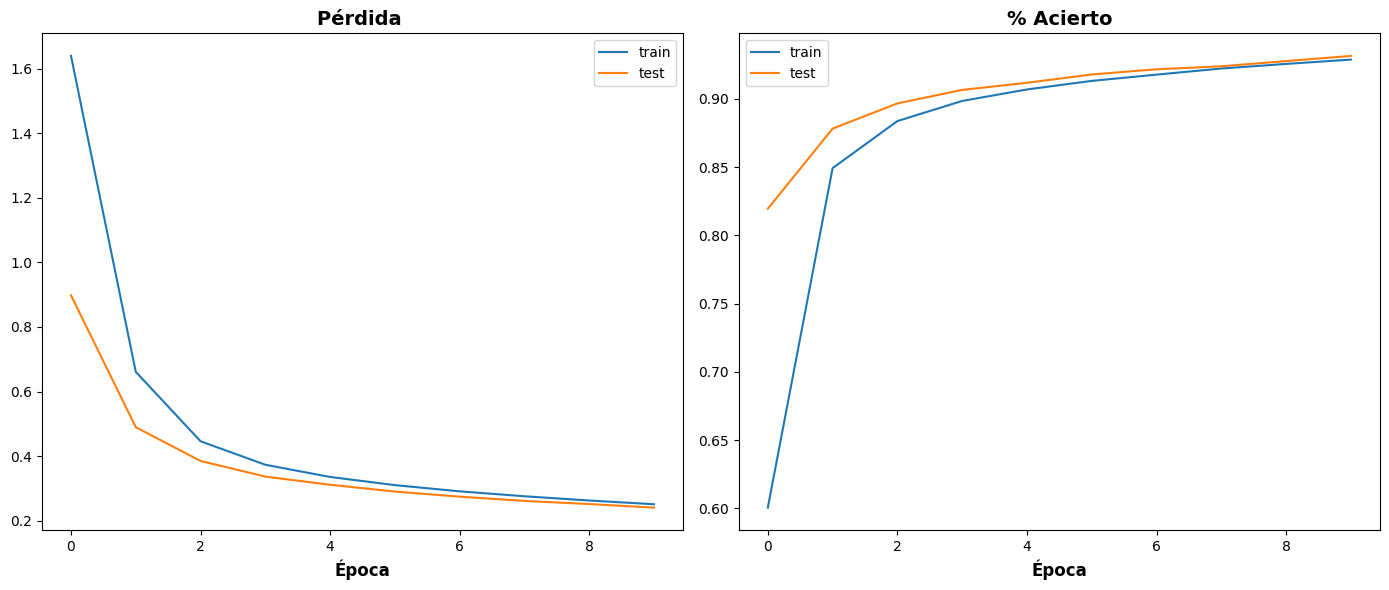

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch256.history['loss'], label="train")
axs[0].plot(hist_batch256.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch256.history['accuracy'], label="train")
axs[1].plot(hist_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [ ]:
Batch_size_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'batch size = 32': [hist_relu.history[k][-1] for k in hist_relu.history],
    'batch size = 64': [hist_batch64.history[k][-1] for k in hist_batch64.history],
    'batch size = 256': [hist_batch256.history[k][-1] for k in hist_batch256.history],
}

df_batch = pd.DataFrame(Batch_size_vs)

display(df_batch)

M√©trica  batch size = 32  batch size = 64  batch size = 256
0          loss         0.062757         0.113340          0.251012
1      accuracy         0.981933         0.967517          0.928817
2      val_loss         0.082305         0.119618          0.240513
3  val_accuracy         0.972700         0.964600          0.931500

El batch size m√°s peque√±o (32) produjo los mejores resultados tanto en entrenamiento como en validaci√≥n. Tiene la mayor accuracy y val_accuracy, y las menores loss y val_loss A medida que el batch size aumenta, el rendimiento empeora:

La precisi√≥n (accuracy y val_accuracy) disminuye.

La p√©rdida (loss y val_loss) aumenta notablemente.

Batch sizes peque√±os tienden a proporcionar un aprendizaje con mejores metricas (accuracy y perdida), ###al introducir m√°s ruido estoc√°stico que puede ayudar a salir de m√≠nimos locales.

En cambio, batch sizes grandes pueden hacer que el modelo converja m√°s r√°pido, pero a veces a soluciones menos √≥ptimas. Pero batch sizes grandes pueden reducir el sobreentrenamiento, y se ve reflejado en la diferencia de accuracy y su validacion Batch size 32	con una diferencia de 0.0218, batch size de 64 con un diferencia de 0.0042 y batch size de 256 con una diferencia de 0.0050.

En conclucion:

Batch size peque√±o (32): aprende muy bien, pero tambi√©n tiende a memorizar m√°s el entrenamiento con mayor riesgo de overfitting.

Batch size grande (256): aprende de forma m√°s "estable", menos overfitting, pero tambi√©n menor rendimiento o errores mas grandes

Ya que el sobre entrenmiento en nuestro caso no es tan grande nos quedaremos con un batch size de 32 ya que la perdida o el error es mucho mas bajo que los demas tama√±os.

## Cambio de epochs

In [ ]:
red_epoca = keras.Sequential(name="Mi_Red")
red_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_epoca = red_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_epoca.save("red_epoca.keras")

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5471 - accuracy: 0.8612 - val_loss: 0.2614 - val_accuracy: 0.9260
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2372 - accuracy: 0.9317 - val_loss: 0.1980 - val_accuracy: 0.9443
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1841 - accuracy: 0.9468 - val_loss: 0.1634 - val_accuracy: 0.9521
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1506 - accuracy: 0.9565 - val_loss: 0.1515 - val_accuracy: 0.9556
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9637 - val_loss: 0.1266 - val_accuracy: 0.9617
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.1155 - val_accuracy: 0.9660
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0934 - accuracy: 0.9733 - val_loss: 0.1117 - val_accuracy:

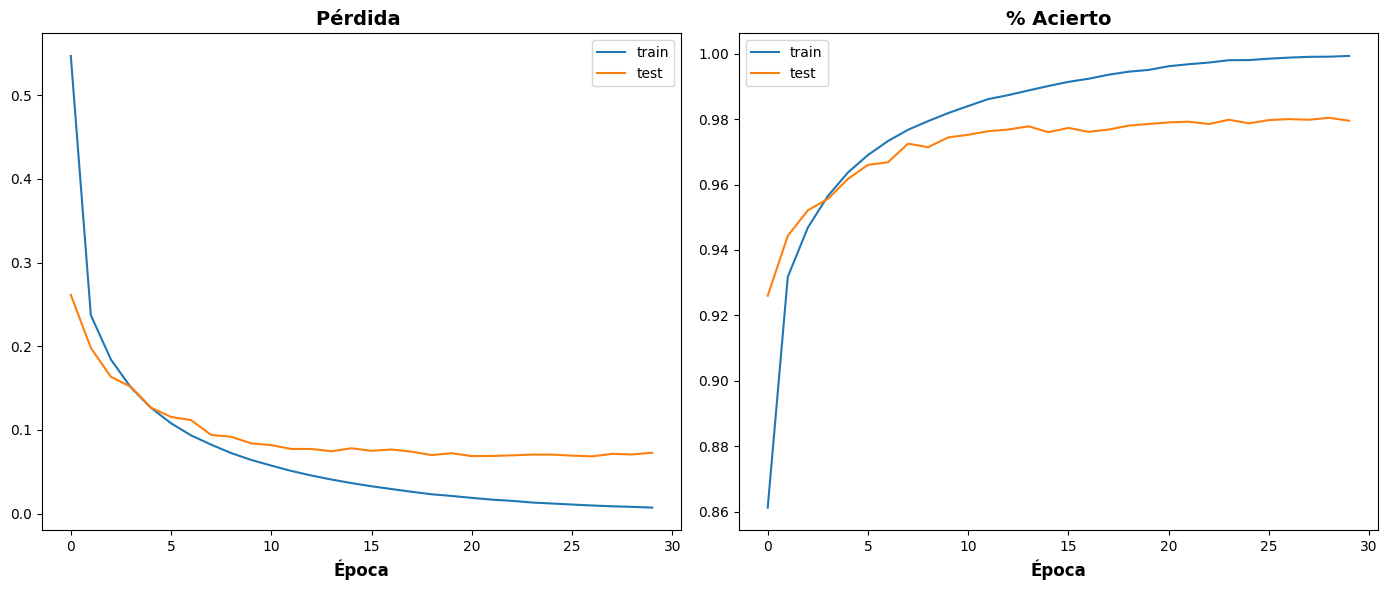

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_epoca.history['loss'], label="train")
axs[0].plot(hist_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_epoca.history['accuracy'], label="train")
axs[1].plot(hist_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [ ]:
Epoca_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Epoca = 10': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Epoca = 30': [hist_epoca.history[k][-1] for k in hist_epoca.history],
    #'Epoca = 50': [.history[k][-1] for k in .history],
}

df_epoca = pd.DataFrame(Epoca_vs)

display(df_epoca)

M√©trica  Epoca = 10  Epoca = 30
0          loss    0.062757    0.007021
1      accuracy    0.981933    0.999317
2      val_loss    0.082305    0.072655
3  val_accuracy    0.972700    0.979500

Al aumentar las √©pocas de entrenamiento de 10 a 30, se observa una mejora general en todas las m√©tricas.

El modelo logra una mayor precisi√≥n tanto en entrenamiento como en validaci√≥n:

accuracy: sube ligeramente de 0.9984 ‚Üí 0.9996

val_accuracy: tambi√©n mejora, aunque de forma m√°s modesta (0.9766 ‚Üí 0.9787)

La p√©rdida (loss) disminuye en ambos conjuntos:

loss: se reduce casi a la mitad (0.0123 ‚Üí 0.0068)

val_loss: tambi√©n mejora, aunque de manera leve (0.0797 ‚Üí 0.0778)

¬°Buena pregunta! Aumentar la cantidad de √©pocas puede mejorar el rendimiento, pero tambi√©n tiene costos y riesgos que vale la pena considerar. Te los explico:

‚öñÔ∏è Costos de usar m√°s √©pocas
1. üïí Mayor tiempo de entrenamiento
Cada √©poca significa pasar una vez por todo el conjunto de datos, as√≠ que m√°s √©pocas = m√°s tiempo.

Esto puede ser costoso si:

El dataset es grande

Est√°s probando muchas configuraciones

Usas hardware limitado

2. üß† Riesgo de sobreentrenamiento (overfitting)
A partir de cierto punto, el modelo memoriza el conjunto de entrenamiento en vez de aprender a generalizar.

Esto se nota cuando:

accuracy sigue subiendo

pero val_accuracy se estanca o baja

y val_loss comienza a subir

En tu tabla, no se ve sobreentrenamiento a√∫n, pero si entrenaras 100 √©pocas podr√≠as empezar a verlo.

3. üí∞ Mayor consumo de recursos
M√°s uso de GPU/CPU

M√°s energ√≠a (si entrenas en cloud, m√°s costos)

Mayor desgaste de hardware si haces muchos ciclos largos

##Cambio numero de capas

In [ ]:
red_capa4 = keras.Sequential(name="Red_4capas")
red_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h2, activation='relu'))
red_capa4.add(keras.layers.Dense(h3, activation='relu'))
red_capa4.add(keras.layers.Dense(C, activation='softmax'))

red_capa4.summary()

Model: "Red_4capas"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 830090 (3.17 MB)
Trainable params: 830090 (3.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####PREGUNTAR A LA PROFE SI O SI EL TAMA√ëO DE NEURONA IENE QUE BAJAR; YO RENIA ENTENDIDO QUE NO Y SI SE PUEDE REPERTIR VALOR

In [ ]:
red_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_capa4 = red_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_capa4.save("red_capa4.keras")

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5330 - accuracy: 0.8573 - val_loss: 0.2430 - val_accuracy: 0.9283
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2136 - accuracy: 0.9378 - val_loss: 0.1734 - val_accuracy: 0.9503
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1564 - accuracy: 0.9541 - val_loss: 0.1389 - val_accuracy: 0.9591
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1228 - accuracy: 0.9644 - val_loss: 0.1336 - val_accuracy: 0.9610
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0996 - accuracy: 0.9713 - val_loss: 0.1026 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0821 - accuracy: 0.9760 - val_loss: 0.0972 - val_accuracy: 0.9695
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0695 - accuracy: 0.9801 - val_loss: 0.0992 - val_accuracy:

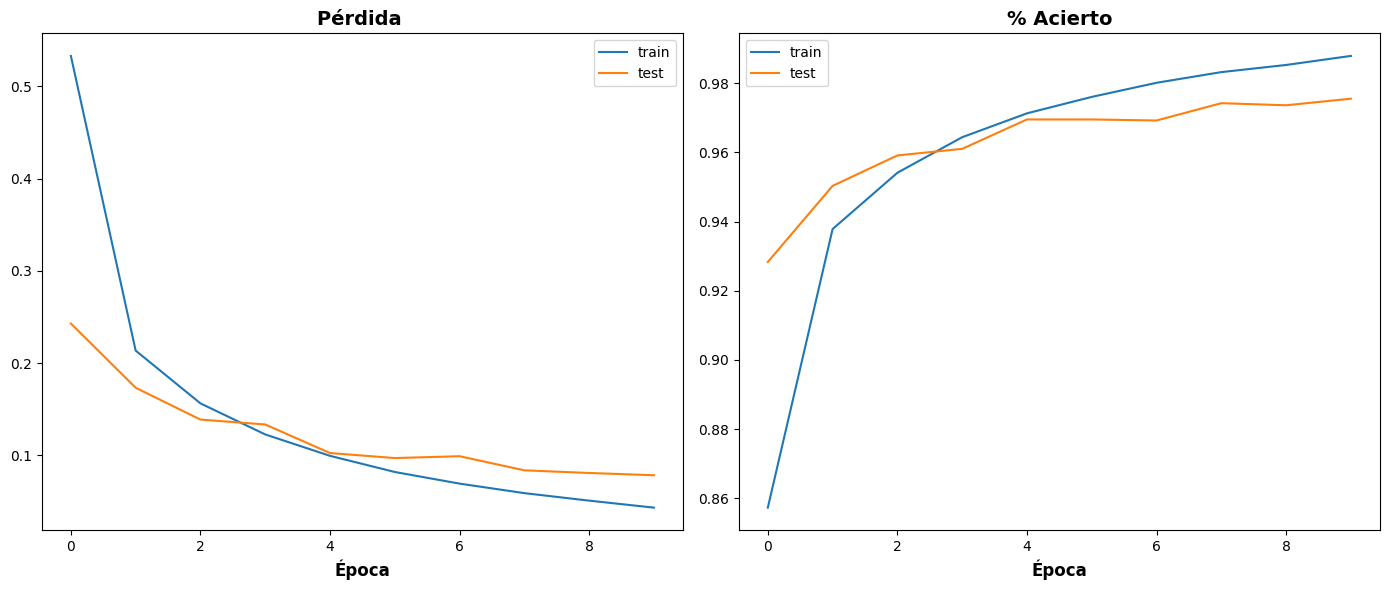

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_capa4.history['loss'], label="train")
axs[0].plot(hist_capa4.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_capa4.history['accuracy'], label="train")
axs[1].plot(hist_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

In [ ]:
Capas_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Capas = 3': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Capas = 4': [hist_capa4.history[k][-1] for k in hist_capa4.history]
}

df_capas = pd.DataFrame(Capas_vs)

display(df_capas)

M√©trica  Capas = 3  Capas = 4
0          loss   0.062757   0.043433
1      accuracy   0.981933   0.987867
2      val_loss   0.082305   0.078554
3  val_accuracy   0.972700   0.975500

## Agregaci√≥n de regulaci√≥n (drop-out)

In [ ]:
red_dropout = keras.Sequential(name="red_dropout")
red_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout.add(keras.layers.Dense(h1, activation='relu'))
#
red_dropout.add(keras.layers.Dense(30, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.3))
red_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_dropout.summary()

Model: "red_dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               401920    
                                                                 
 dense_22 (Dense)            (None, 30)                15390     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_23 (Dense)            (None, 20)                620       
                                                                 
 dense_24 (Dense)            (None, 256)               5376      
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                

In [ ]:
red_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_dropout = red_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1691 - accuracy: 0.6108 - val_loss: 0.3290 - val_accuracy: 0.9041
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3918 - accuracy: 0.8825 - val_loss: 0.2092 - val_accuracy: 0.9362
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.9154 - val_loss: 0.1666 - val_accuracy: 0.9506
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9321 - val_loss: 0.1385 - val_accuracy: 0.9574
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1931 - accuracy: 0.9423 - val_loss: 0.1233 - val_accuracy: 0.9605
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.9512 - val_loss: 0.1104 - val_accuracy: 0.9654
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9579 - val_loss: 0.1061 - val_accuracy:

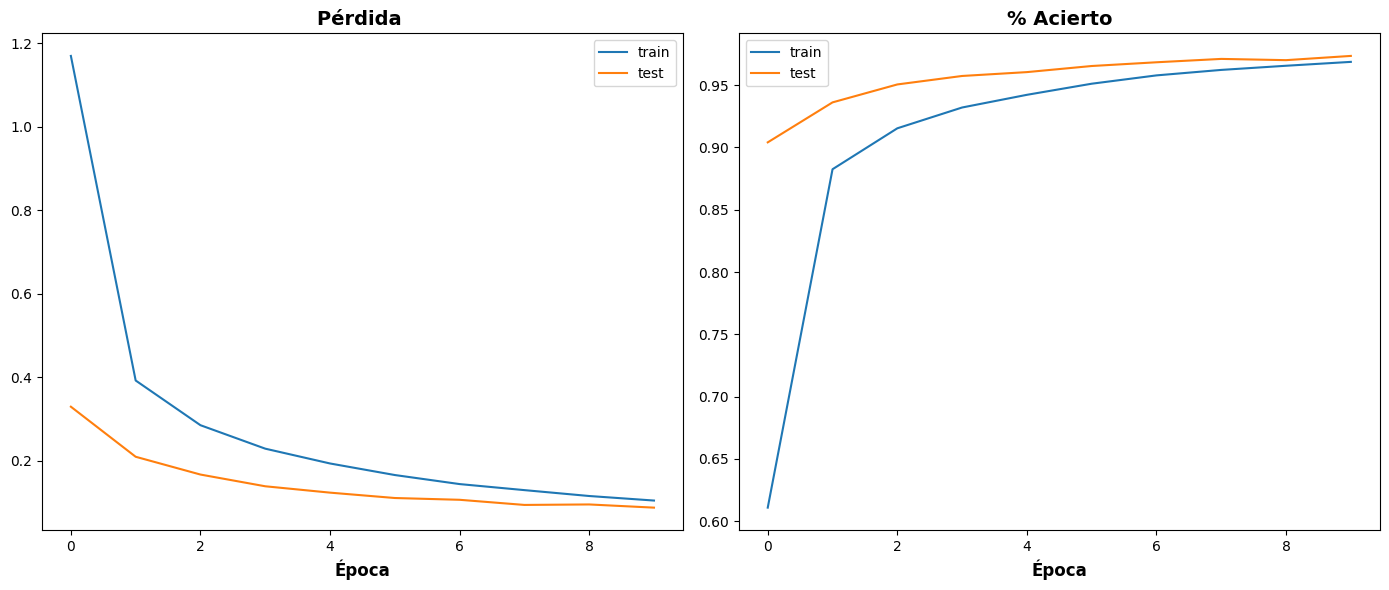

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_dropout.history['loss'], label="train")
axs[0].plot(hist_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_dropout.history['accuracy'], label="train")
axs[1].plot(hist_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


In [ ]:
Dropout_vs = {
    'M√©trica': list(hist_relu.history.keys()),
    'Sin DropOut': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Con DropOut': [hist_dropout.history[k][-1] for k in hist_dropout.history]
}

df_dropout = pd.DataFrame(Dropout_vs)

display(df_dropout)

M√©trica  Sin DropOut  Con DropOut
0          loss     0.062757     0.104325
1      accuracy     0.981933     0.968717
2      val_loss     0.082305     0.087339
3  val_accuracy     0.972700     0.973500

In [ ]:
###PRUEBA

modelos = [red_relu, red_elu, red_batch64, red_batch256, red_epoca, red_capa4, red_dropout]
historiales = [hist_relu, hist_elu, hist_batch64, hist_batch256, hist_epoca, hist_capa4, hist_dropout]

val_accuracies_final = [h.history['loss'][-1] for h in historiales]
indice_mejor = val_accuracies_final.index(min(val_accuracies_final))

mejor_modelo = modelos[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
mejor_val_acc = val_accuracies_final[indice_mejor]

print(f"El mejor modelo seg√∫n loss final es: '{nombre_mejor_modelo}' ({mejor_val_acc:.4f})")
mejor_modelo.save('modelo_final.keras')

El mejor modelo seg√∫n loss final es: 'Mi_Red' (0.0070)


In [ ]:
print("Resultados finales de cada modelo:\n")
for modelo, hist in zip(modelos, historiales):
    name = modelo.name
    acc = hist.history['accuracy'][-1]
    loss = hist.history['loss'][-1]
    val_acc = hist.history['val_accuracy'][-1]
    val_loss = hist.history['val_loss'][-1]

    print(f"Modelo: {name}")
    print(f"Accuracy:      {acc:.4f}")
    print(f"Loss:          {loss:.4f}")
    print(f"Val Accuracy:  {val_acc:.4f}")
    print(f"Val Loss:      {val_loss:.4f}\n")

Resultados finales de cada modelo:

üî∏ Modelo: Red_relu
   - Accuracy:      0.9819
   - Loss:          0.0628
   - Val Accuracy:  0.9727
   - Val Loss:      0.0823

üî∏ Modelo: red_elu
   - Accuracy:      0.9699
   - Loss:          0.1034
   - Val Accuracy:  0.9662
   - Val Loss:      0.1097

üî∏ Modelo: relu_bs_64
   - Accuracy:      0.9675
   - Loss:          0.1133
   - Val Accuracy:  0.9646
   - Val Loss:      0.1196

üî∏ Modelo: batch256
   - Accuracy:      0.9288
   - Loss:          0.2510
   - Val Accuracy:  0.9315
   - Val Loss:      0.2405

üî∏ Modelo: Mi_Red
   - Accuracy:      0.9993
   - Loss:          0.0070
   - Val Accuracy:  0.9795
   - Val Loss:      0.0727

üî∏ Modelo: Red_4capas
   - Accuracy:      0.9879
   - Loss:          0.0434
   - Val Accuracy:  0.9755
   - Val Loss:      0.0786

üî∏ Modelo: red_dropout
   - Accuracy:      0.9687
   - Loss:          0.1043
   - Val Accuracy:  0.9735
   - Val Loss:      0.0873



# Experimento 2: Optimizador Adam

## Activadores (Relu y Elu)

### Relu

In [ ]:
red_relu_adam = keras.Sequential(name="Mi_Red")
red_relu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu_adam.add(keras.layers.Dense(h1, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h2, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h3, activation='relu'))
red_relu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_relu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_relu_adam = red_relu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
 4093/60000 [=>............................] - ETA: 2:14 - loss: 0.6083 - accuracy: 0.8085

KeyboardInterrupt: 

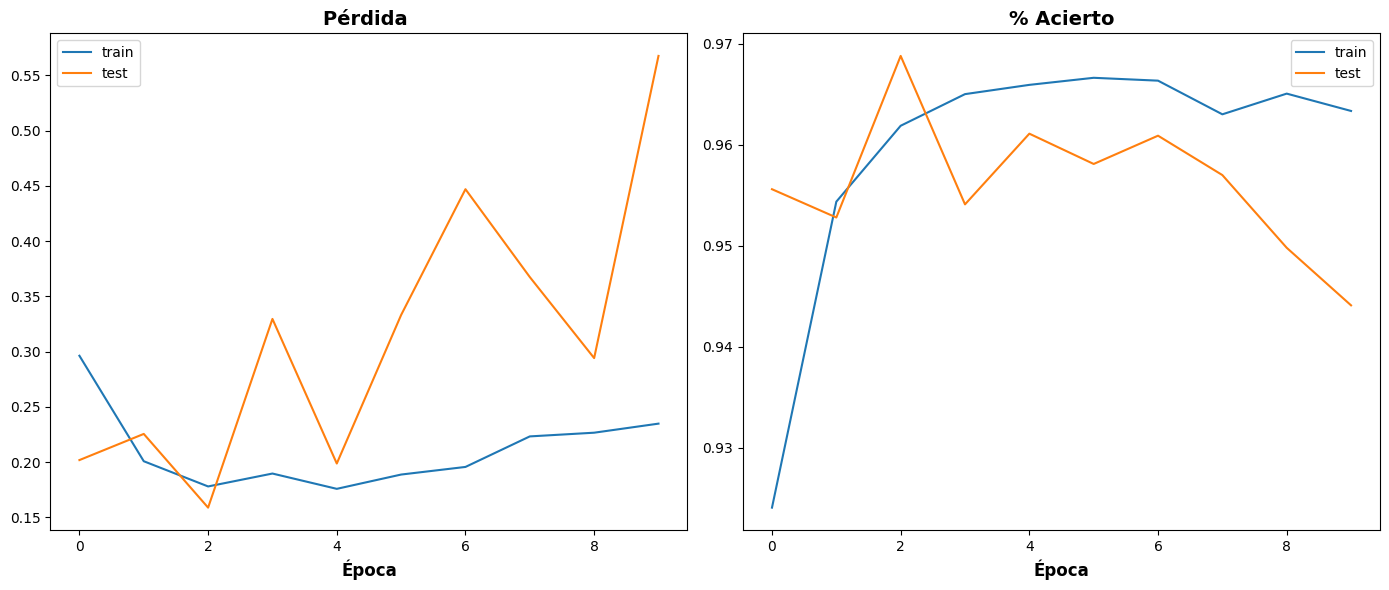

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs.set_title('Activadores (Relu y Elu)', fontsize=14, fontweight="bold")

axs[0].plot(hist_relu_adam.history['loss'], label="train")
axs[0].plot(hist_relu_adam.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu_adam.history['accuracy'], label="train")
axs[1].plot(hist_relu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()


# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


### ELU

In [ ]:
red_elu_adam = keras.Sequential(name="Mi_Red")
red_elu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu_adam.add(keras.layers.Dense(h1, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h2, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h3, activation='elu'))
red_elu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_elu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Increased batch size to speed up training and avoid keyboard interrupt
hist_elu_adam = red_elu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=64,  # Changed from 1 to 64 to speed up training
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2319 - accuracy: 0.9302 - val_loss: 0.1452 - val_accuracy: 0.9571
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoc

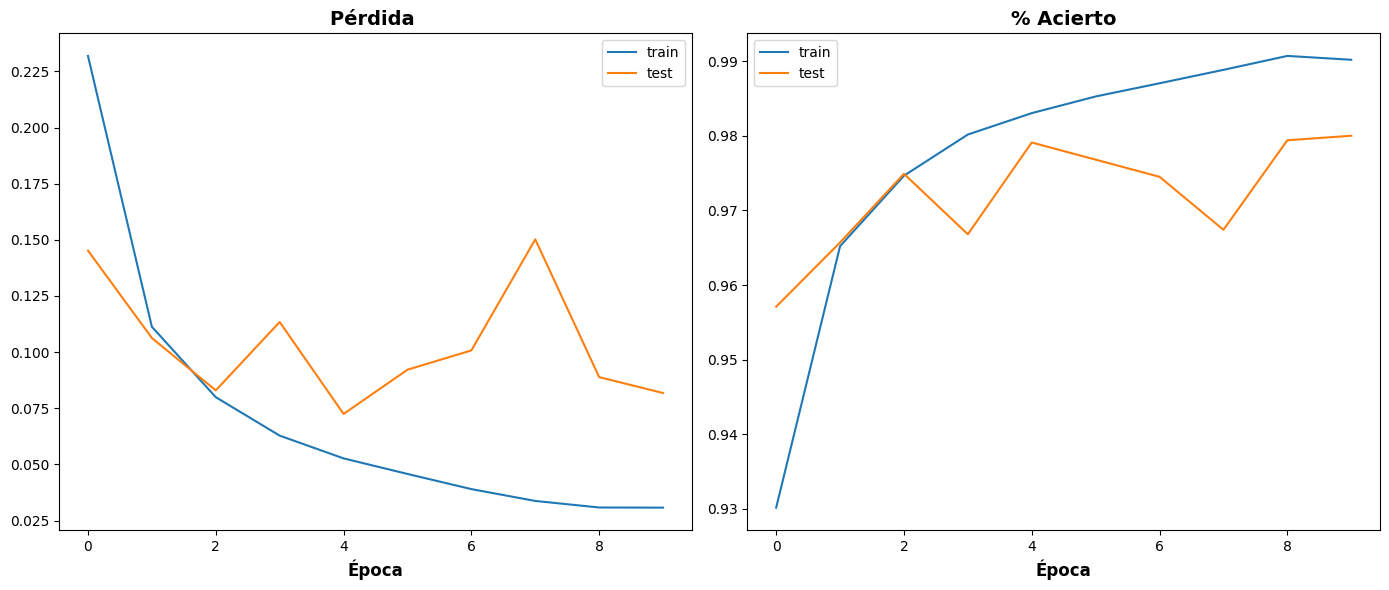

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu_adam.history['loss'], label="train")
axs[0].plot(hist_elu_adam.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu_adam.history['accuracy'], label="train")
axs[1].plot(hist_elu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()


# #

# Cambio Batch Size

# Cambio Batch Size de 32


In [ ]:
red_adam_batch32 = keras.Sequential(name="Mi_Red")
red_adam_batch32.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch32.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch32.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch32 = red_adam_batch32.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1942 - accuracy: 0.9415 - val_loss: 0.1263 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0743 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0837 - val_acc

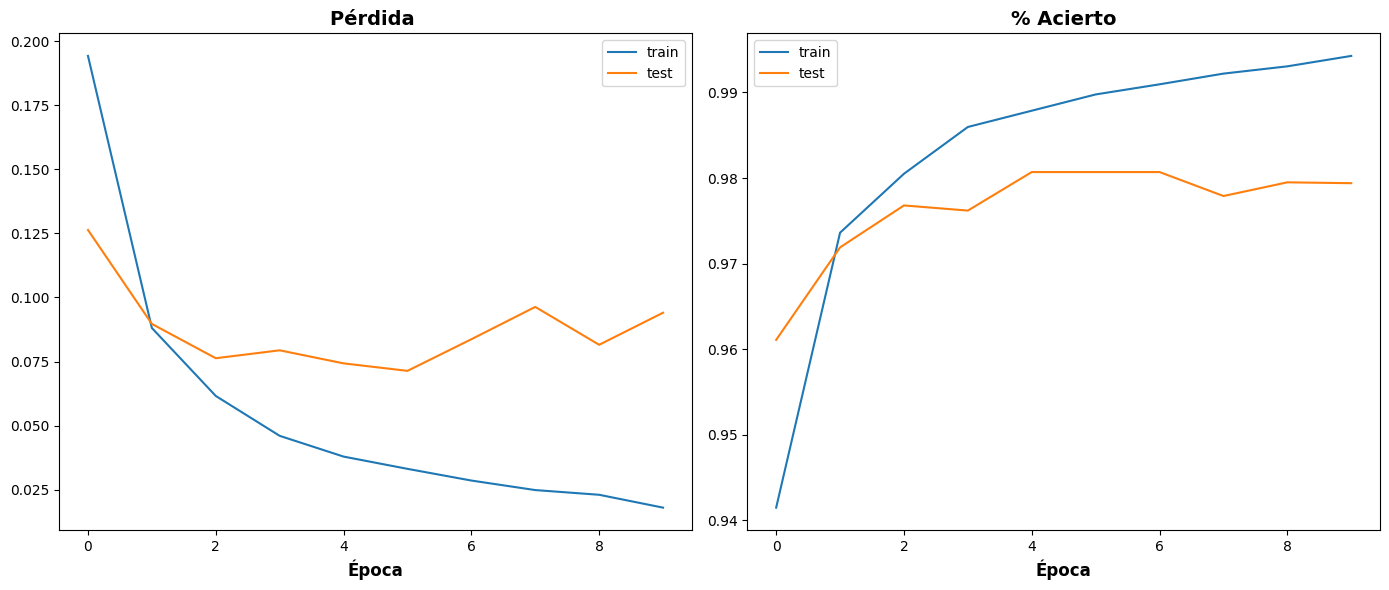

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch32.history['loss'], label="train")
axs[0].plot(hist_adam_batch32.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch32.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch32.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()



## Cambio Batch Size de 64

In [ ]:
red_adam_batch64 = keras.Sequential(name="Mi_Red")
red_adam_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch64 = red_adam_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2062 - accuracy: 0.9386 - val_loss: 0.1402 - val_accuracy: 0.9518
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0792 - val_accuracy: 0.9761
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0939 - val_accuracy: 0.9760
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 

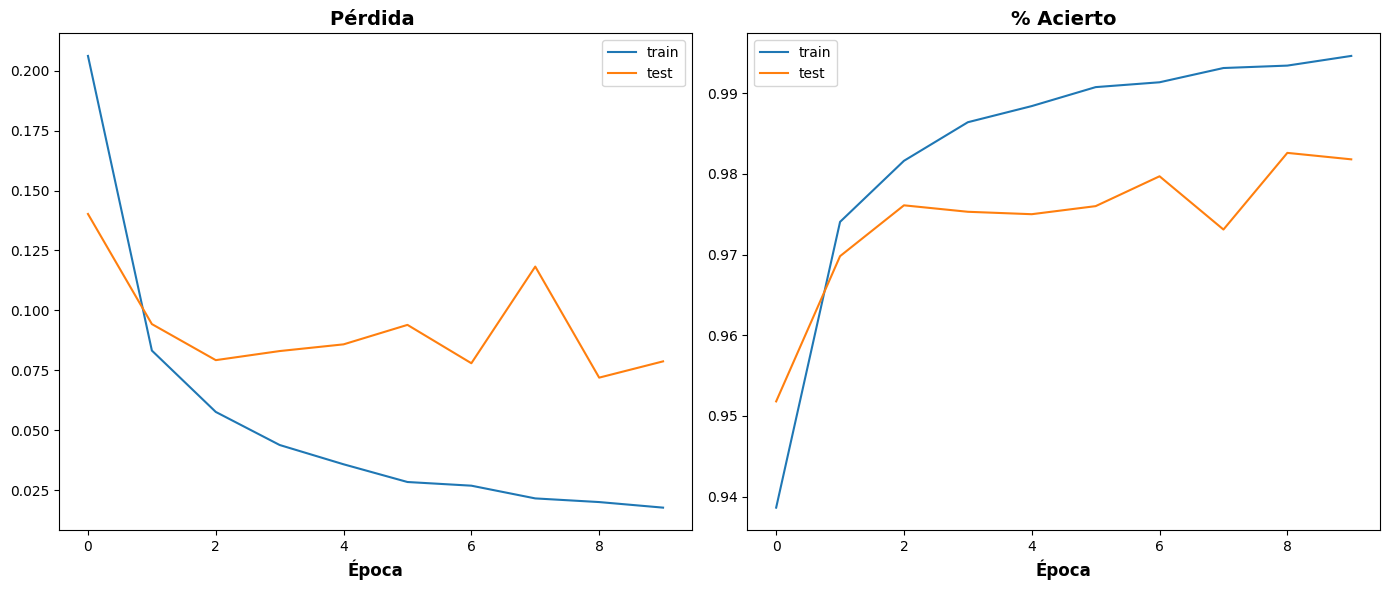

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch64.history['loss'], label="train")
axs[0].plot(hist_adam_batch64.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch64.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Cambio de epocas

In [ ]:
red_adam_epoca = keras.Sequential(name="Mi_Red")
red_adam_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_adam_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_epoca = red_adam_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
938/938 [==============================] - 7s 6ms/step - loss: 0.2075 - accuracy: 0.9380 - val_loss: 0.1532 - val_accuracy: 0.9523
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0916 - val_accuracy: 0.9705
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0796 - val_accuracy: 0.9798
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 

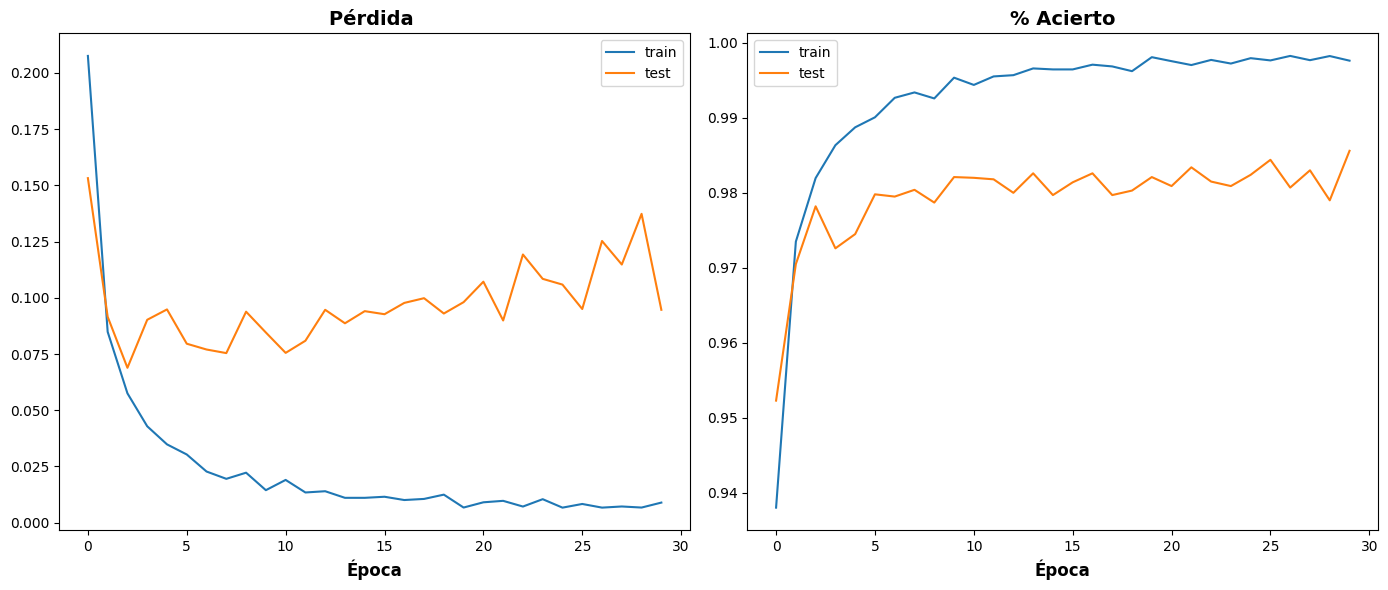

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_epoca.history['loss'], label="train")
axs[0].plot(hist_adam_epoca.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_epoca.history['accuracy'], label="train")
axs[1].plot(hist_adam_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

## Agregaci√≥n de regulaci√≥n (drop-out)

In [ ]:
red_adam_dropout= keras.Sequential(name="Mi_Red")
red_adam_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red_adam_dropout.add(keras.layers.Dense(30, activation='relu'))
red_adam_dropout.add(keras.layers.Dropout(0.3))
red_adam_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_adam_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_adam_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_adam_dropout = red_adam_dropout.fit(X_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 2.1976 - accuracy: 0.2510 - val_loss: 1.8218 - val_accuracy: 0.5131
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 1.3008 - accuracy: 0.5692 - val_loss: 0.7278 - val_accuracy: 0.7847
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.8190 - accuracy: 0.7292 - val_loss: 0.5171 - val_accuracy: 0.8521
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6688 - accuracy: 0.7879 - val_loss: 0.4222 - val_accuracy: 0.8808
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5871 - accuracy: 0.8173 - val_loss: 0.3778 - val_accuracy: 0.8913
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5294 - accuracy: 0.8370 - val_loss: 0.3365 - val_accuracy: 0.9023
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4876 - accuracy: 0.8501 - val_loss: 0.3223 - val_accuracy: 0.9049
Epoch 

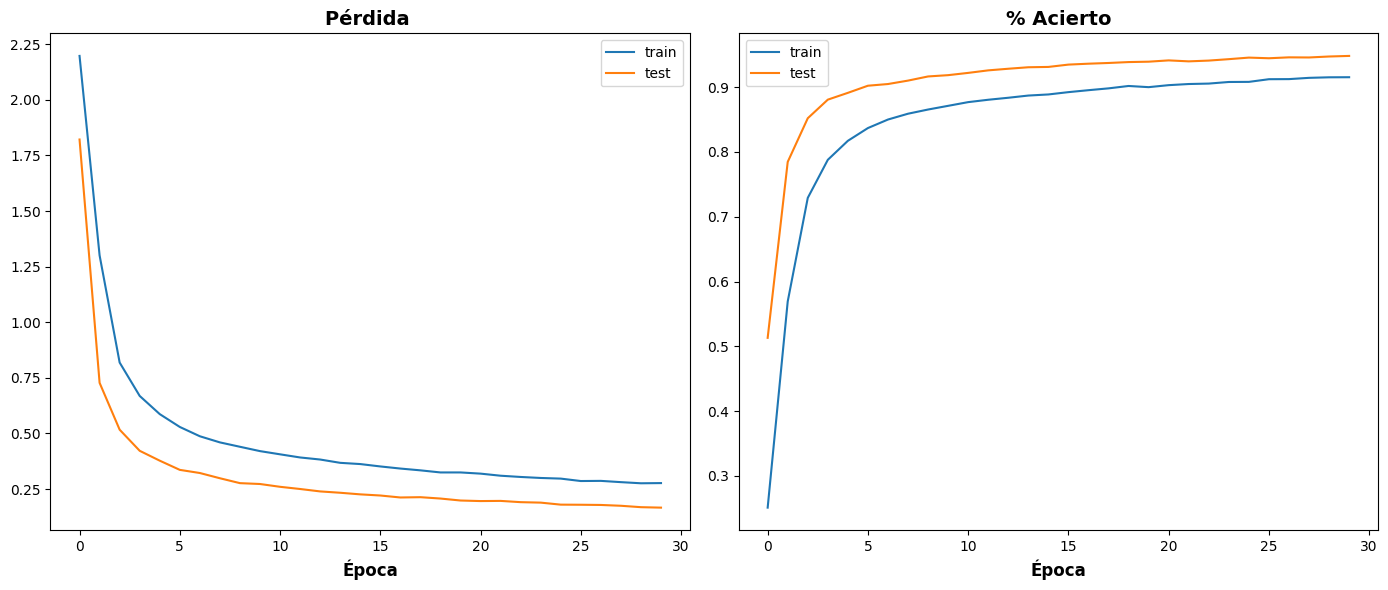

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_dropout.history['loss'], label="train")
axs[0].plot(hist_adam_dropout.history['val_loss'], label="test")
axs[0].set_title('P√©rdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_dropout.history['accuracy'], label="train")
axs[1].plot(hist_adam_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('√âpoca', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gr√°ficos
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=952c4989-d7be-4048-8bbc-02e7b294e3b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>